In [1]:
#데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

retail_df = pd.read_excel('C:/Users/82104/Desktop/스파르타_데이터부트캠프/VSCODE/Online_Retail/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [2]:
#결측치 확인
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# 데이터 EDA 및 전처리
retail_df.describe(include='all')

# Quantity 와 UnitPrice가 음수인 경우가 존재/ 두개의 값은 음수가 존재하면 안된다

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [5]:
# 데이터 전처리 전략
# 조건 1 customerID 결측치 삭제
# 조건 2 Invoice가 C로 시작하거나(취소건), Quantity가 음수이거나 , UnitPrice가 음수인 경우 모두 삭제

#customerID 결측치 삭제
cond_cust = retail_df['CustomerID'].notnull()
retail_df[cond_cust].isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
#Invoice가 C로 시작하는 것 삭제
cond_invo = retail_df['InvoiceNo'].astype(str).str[0] != 'C'
retail_df[cond_invo].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [7]:
#Quantity와UnitPrice 음수인 경우 삭제
cond_minus = (retail_df['Quantity'] > 0) & (retail_df['UnitPrice'] > 0)
retail_df[cond_minus]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
retail_df2 = retail_df[cond_cust & cond_invo & cond_minus]
retail_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [9]:
# UK가 대부분의 데이터를 담고 있기 때문에 UK 데이터만 확인해보자

cond_uk = retail_df2['Country'] == 'United Kingdom'
retail_df2 = retail_df2[cond_uk]
retail_df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [10]:
retail_df2.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,354321.0,354321,354321,354321.000000,354321,354321.000000,354321.000000,354321
unique,16646.0,3645,3844,NaN,NaN,NaN,NaN,1
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542.0,1947,1940,NaN,NaN,NaN,NaN,354321
mean,NaN,NaN,NaN,12.013795,2011-07-11 08:04:09.462775296,2.963994,15552.486392,NaN
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:40:00,1.250000,14194.000000,NaN
50%,NaN,NaN,NaN,4.000000,2011-07-31 15:31:00,1.950000,15522.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-23 13:49:00,3.750000,16931.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:49:00,8142.750000,18287.000000,NaN


In [11]:
# Monetary 구하기
retail_df2['Amount'] = retail_df2['Quantity'] * retail_df2['UnitPrice']
retail_df2['Amount'] = retail_df2['Amount'].astype('int')

In [12]:
# 구매한 유저 확인
retail_df2[['CustomerID']].drop_duplicates()

,CustomerID
0,17850.0
9,13047.0
46,13748.0
65,15100.0
82,15291.0
...,...
534480,15471.0
536969,13436.0
537255,15520.0
538064,13298.0


In [13]:
retail_df2.pivot_table(index='CustomerID', values='Amount',aggfunc='sum')

,Amount
CustomerID,
12346.0,77183
12747.0,4143
12748.0,31261
12749.0,3995
12820.0,916
...,...
18280.0,175
18281.0,78
18282.0,171


In [14]:
# Recency 구하기 전 처리
# 가장 최근 구매 날짜가 2011.12.09 이므로 2011.12.10 기준으로 구매 기간을 구한다

import datetime as dt
retail_df2['Period'] = (dt.datetime(2011,12,10) - retail_df2['InvoiceDate']).apply(lambda x: x.days+1)
retail_df2['Period']

0         374
1         374
2         374
3         374
4         374
         ... 
541889      1
541890      1
541891      1
541892      1
541893      1
Name: Period, Length: 354321, dtype: int64

In [18]:
rfm_df = retail_df2.groupby('CustomerID').agg({
    'Period' : 'min',
    'InvoiceNo' : 'count',
    'Amount' : 'sum'
})

rfm_df.columns = ['Recency','Frequency','Monetary']

In [20]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_features = sc.fit_transform(rfm_df[['Recency','Frequency','Monetary']])

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeas = KMeans(n_clusters=3,random_state=42)
labels = kmeas.fit_predict(X_features)

rfm_df['label'] = labels
silhouette_score(X_features,labels)

c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.592575402996014

c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

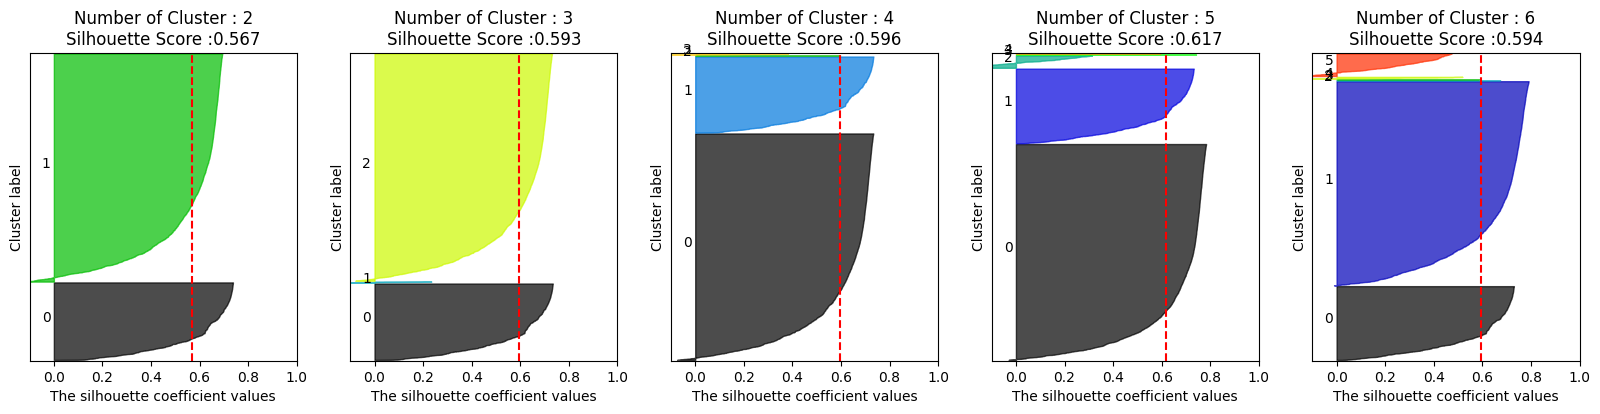

In [22]:
#실루에계수 시각화

from kmeans_visaul import visualize_silhouette
visualize_silhouette([2,3,4,5,6], X_features)

c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\82104\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

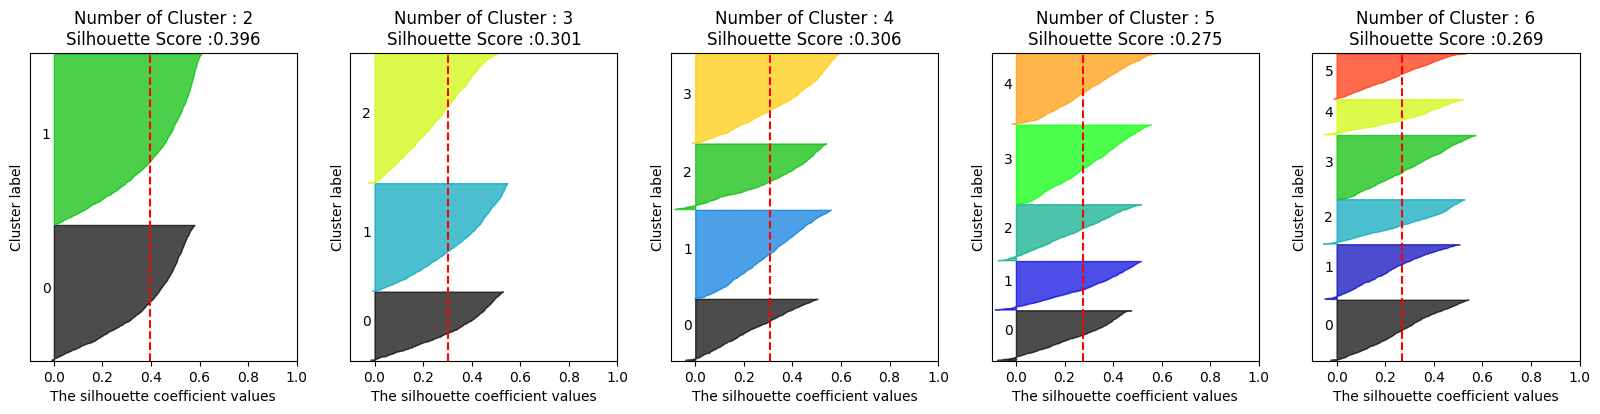

In [23]:
# log 스케일을 통한 추가 전처리

import numpy as np

rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])

X_features2 = rfm_df[['Recency_log','Frequency_log','Monetary_log']]
sc2 = StandardScaler()
X_features2_sc = sc2.fit_transform(X_features2)

visualize_silhouette([2,3,4,5,6],X_features2)